In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/Sarthak Sharma/Desktop/IITG/hacktrain.csv")
df.head()

,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,NaN,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,729.790,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,NaN,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


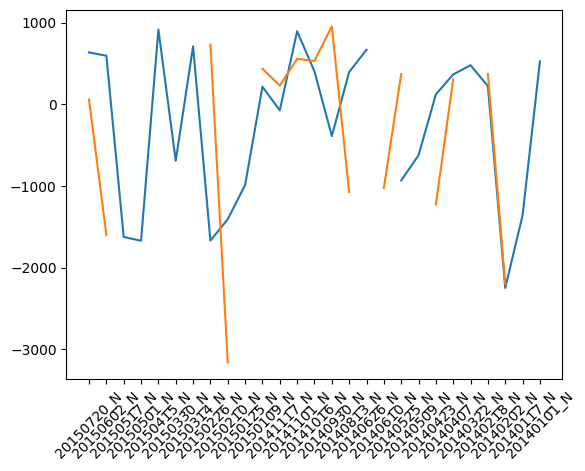

In [2]:
plt.plot(df.columns[2:], df.iloc[[1,2],2:].T)
plt.xticks(rotation = 45)
plt.show()


In [3]:
df_copy = df.copy()
cols = [col for col in df.columns if '_N' in col]

def fillna_(row):
    return row.fillna(row.rolling(window=3, min_periods=1, center=True).median())

df_copy[cols] = df_copy[cols].apply(fillna_, axis=1)
df_copy[cols] = df_copy[cols].apply(fillna_, axis=1)
df_copy[cols] = df_copy[cols].apply(fillna_, axis=1)
df_copy[cols] = df_copy[cols].apply(fillna_, axis=1)
df_copy.isnull().sum()

ID            0
class         0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64

In [4]:
df_denoised = df_copy.copy()
df_denoised[cols] = df_denoised[cols].T.rolling(3, min_periods = 1, center = True).median().T
df_denoised.isnull().sum() #denoisisng somehow loses score so I haven't used it

ID            0
class         0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64

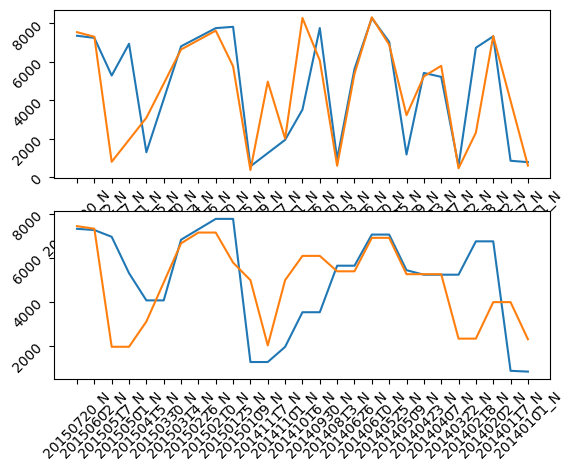

In [5]:
fig, ax = plt.subplots(2,1)
ax[0].plot(df_copy.columns[2:], df_copy.iloc[[1000,1001],2:].T)
ax[0].tick_params(rotation = 45)
ax[1].plot(df_denoised.columns[2:], df_denoised.iloc[[1000,1001],2:].T)
ax[1].tick_params(rotation = 45)
plt.show()

In [6]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler

X = df_copy.drop(columns=['ID', 'class'])  # Dropping ID before fitting
y = df_copy['class']

# Creating sampling pipeline with ADASYN
sampling_pipeline = Pipeline([
    ('oversample', ADASYN(
        sampling_strategy={
            'farm': 2000,
            'impervious': 1500,
            'grass': 1000,
            'water': 800,
            'orchard': 300
        },
        random_state=21,
        n_neighbors=9  # Only valid parameter besides sampling_strategy
    ))
])

X_resampled, y_resampled = sampling_pipeline.fit_resample(X, y)

# Combining X_resampled and y_resampled into a new DataFrame
df_denoised2 = X_resampled.copy()
df_denoised2['class'] = y_resampled

df_denoised2

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N,class
0,637.595000,658.668000,-1882.030000,-1924.360000,997.904000,-1739.990000,630.087000,-347.776500,-1325.640000,-944.084000,...,-1043.160000,-1942.490000,267.138000,267.138000,211.328000,211.328000,-2203.020000,-1180.190000,433.906000,water
1,634.240000,593.705000,-1625.790000,-1672.320000,914.198000,-692.386000,707.626000,-1670.590000,-1408.640000,-989.285000,...,-933.934000,-625.385000,120.059000,364.858000,476.972000,220.878000,-2250.000000,-1360.560000,524.075000,water
2,58.017400,-1599.160000,-1325.895000,-1052.630000,-1308.630000,-1564.630000,-417.420000,729.790000,-3162.140000,-1364.372000,...,368.622000,-429.589000,-1227.800000,304.621000,336.917500,369.214000,-2202.120000,-1772.835000,-1343.550000,water
3,72.518000,226.477000,380.436000,-1256.930000,515.805000,-1413.180000,-802.942000,683.254000,-2829.400000,-1267.540000,...,155.624000,-384.224500,-924.073000,432.150000,282.833000,298.320000,-2197.360000,-1512.043500,-826.727000,water
4,1136.440000,1136.440000,1647.830000,1647.830000,1935.800000,2047.390000,2158.980000,1700.925000,1242.870000,-2646.050000,...,1959.430000,-279.317000,-384.915000,-113.406000,1020.720000,1660.650000,-116.801000,-568.050000,-1357.140000,water
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11801,5327.354594,4792.011268,3572.080712,4128.437085,677.812008,3775.896252,789.049176,3078.162387,4449.857692,3834.658631,...,3772.039146,3595.514987,1748.309606,1002.750437,2347.197915,3377.449970,3824.090491,1804.882202,1231.123024,water
11802,5007.844223,4327.503015,3792.837334,4378.678230,2768.844587,4769.658658,2896.862154,1546.791828,5191.008796,5083.522794,...,3829.595704,3498.992286,2751.811142,1249.424333,2760.659879,3698.490387,4311.849158,3465.749160,654.224615,water
11803,4915.387587,4204.997683,3832.676983,4412.935014,3088.664007,4930.651968,3214.543931,1348.109750,5264.067407,5182.649216,...,3837.646043,3483.957348,2921.262988,1270.381017,2788.424982,3642.579904,4328.004713,3710.427682,680.590295,water
11804,3712.778899,3445.100696,3131.430838,3122.174611,2233.418862,2565.512081,2143.726162,2415.640322,2687.554481,2959.000746,...,2455.951317,2082.578642,1380.194137,528.999599,791.110318,1053.221037,4014.307746,923.549262,520.352094,water


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Fit the encoder on the original labels
label_encoder = LabelEncoder()
label_encoder.fit(df['class'])  # Only used for fitting known class names

df_denoised2['class'] = label_encoder.transform(df_denoised2['class'])

# Split into features and target
X2 = df_denoised2.drop(columns=['class'])
y2 = df_denoised2['class']

X_train, X_test, y_train, y_test = train_test_split(
    X2, y2, test_size=0.2, random_state=21, stratify=y2)

model = LogisticRegression(
    multi_class='multinomial',
    solver='newton-cg',
    max_iter=2000
)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Classification report
print(classification_report(
    y_test,
    y_pred,
    labels=list(range(len(label_encoder.classes_))),
    target_names=label_encoder.classes_
))

c:\Users\Sarthak Sharma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

        farm       0.56      0.50      0.53       409
      forest       0.77      0.89      0.83      1232
       grass       0.50      0.29      0.37       204
  impervious       0.60      0.58      0.59       296
     orchard       0.62      0.26      0.37        61
       water       0.75      0.73      0.74       160

    accuracy                           0.70      2362
   macro avg       0.63      0.54      0.57      2362
weighted avg       0.69      0.70      0.69      2362



In [8]:
test_data = pd.read_csv("C:/Users/Sarthak Sharma/Desktop/IITG/hacktest.csv")
ID = test_data['ID']
test_data.drop(['ID'],axis = 1, inplace = True)
test_data

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,7466.4200,413.162,5761.000,5625.45,489.4030,3923.84,3097.110,6766.42000,2829.130,6742.570,...,801.184,927.115,4704.14,6378.42,340.949,2695.5700,527.268,4736.75,601.843,6639.760
1,7235.2600,6037.350,1027.560,6085.14,1618.0500,6668.54,2513.990,1051.69000,7268.220,6908.180,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.1400,3298.110,6942.68,1070.440,842.101
2,7425.0800,6969.980,1177.940,7408.93,861.0610,7644.43,814.458,1504.29000,7002.630,6086.560,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.9900,2206.100,6928.93,1036.560,831.441
3,7119.1200,1731.620,6311.930,6441.61,465.9790,7128.42,1649.120,6935.22000,2176.800,690.408,...,959.344,5794.150,1045.57,5572.90,586.287,685.9060,1287.000,6734.72,824.584,6883.610
4,7519.5500,8130.260,1482.540,7879.53,1001.2100,7937.60,4122.530,1094.51000,7951.440,8001.350,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.5200,3283.940,7937.68,1857.800,1336.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,-1673.7400,-2514.480,-2451.190,-2738.44,64.4464,-2275.03,-2881.100,-4738.97000,-4293.570,-4402.210,...,-2257.890,-2582.420,-1699.10,-2295.30,306.483,209.4030,221.920,-4885.15,-2630.590,356.233
2841,-96.8233,-412.727,-1795.400,-2363.82,-2168.1900,-2162.68,-3155.740,-4416.11000,-5648.660,-5193.280,...,-3991.910,-2614.910,-2109.84,-2687.18,-2853.890,71.3402,-86.414,-5109.01,324.637,-4316.580
2842,-2364.6000,-155.592,-1422.090,-1713.40,465.6220,-2230.40,-3088.730,-5010.32000,-4211.420,-3354.430,...,-2484.500,-1756.080,-3820.43,-1988.23,433.852,291.8000,254.548,-4259.30,412.115,-1170.750
2843,-3004.6300,-1217.120,180.122,-1113.89,438.4180,-2442.51,-3210.560,-3237.74000,-192.857,-2857.540,...,-3291.490,-2018.450,-3472.65,-3109.07,511.792,369.0970,276.948,-5574.51,298.739,460.419


In [9]:
y_test = model.predict(test_data)
y_test

array([4, 4, 4, ..., 5, 5, 3], shape=(2845,))

In [10]:
y_decoded = label_encoder.inverse_transform(y_test)
y_decoded

array(['orchard', 'orchard', 'orchard', ..., 'water', 'water',
       'impervious'], shape=(2845,), dtype=object)

In [11]:
result = pd.DataFrame({
    'ID': ID,
    'class': y_decoded
})
result


,ID,class
0,1,orchard
1,2,orchard
2,3,orchard
3,4,orchard
4,5,orchard
...,...,...
2840,2841,water
2841,2842,water
2842,2843,water
2843,2844,water


In [12]:
result.to_csv("submission.csv", index=False)
